In [22]:
#Importação de Bibliotecas Básicas

#Análise de Banco de dados
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Cálculos em matrizes
import numpy as np

# importando biblioteca para colocar o banco em mesma escala
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# importando biblioteca para dividir em train e test
from sklearn.model_selection import train_test_split 

#KNN
from sklearn.neighbors import KNeighborsRegressor

# Regressão linear múltipla
from sklearn.linear_model import LinearRegression

#Floresta Aleatória
from sklearn.ensemble import RandomForestRegressor 

#Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor

#Plotando a Árvore de Decisão
from sklearn import tree

#Redes Neurais Aritificiais
from sklearn.neural_network import MLPRegressor

#Máquina de Vetor Suporte
from sklearn.svm import SVR

#Métricas de erro
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

In [23]:
# Definindo Qualidade das Imagens
plt.rcParams['figure.dpi'] = 1000
plt.rcParams['savefig.dpi'] = 1000

In [24]:
#Importanto banco de dados de treino e teste

#X_train
X_train = pd.read_excel('X_train_fold0.xlsx')
X_train['qt (kPa)'] = X_train['u2 (kPa)']*0.2 + X_train['qc (kPa)']
X_train = X_train.drop(['Unnamed: 0','qc (kPa)','fs (kPa)','u2 (kPa)','uo (kPa)','T.S.'], axis=1)

#Y_train
Y_train = pd.read_excel('Y_train_fold0.xlsx')
Y_train = Y_train.drop(['Unnamed: 0'], axis=1)

#X_test
X_test = pd.read_excel('X_test_fold0.xlsx')
X_test['qt (kPa)'] = X_test['u2 (kPa)']*0.2 + X_test['qc (kPa)']
X_test = X_test.drop(['Unnamed: 0','qc (kPa)','fs (kPa)','u2 (kPa)','uo (kPa)','T.S.'], axis=1)

#Y_test
Y_test = pd.read_excel('Y_test_fold0.xlsx')
Y_test = Y_test.drop(['Unnamed: 0'], axis=1)

In [25]:
#Verificando o Banco importado

#X-train
X_train.describe()

σvo (kPa)    qt (kPa)
count  180.000000  180.000000
mean    92.909852  223.696454
std     37.393133  104.548959
min     14.897530   39.769142
25%     66.363574  145.695455
50%     90.237986  209.676286
75%    119.645438  292.536770
max    178.458351  511.894600

In [26]:
#Verificando o Banco importado

#X-test
X_test.describe()

σvo (kPa)    qt (kPa)
count   20.000000   20.000000
mean    84.833010  214.268754
std     33.306476   89.675171
min     32.118614   98.508300
25%     61.597654  151.853657
50%     87.611680  194.945805
75%    104.622298  257.340559
max    147.194436  387.291778

In [27]:
#Verificando o Banco importado

#Y-train
Y_train.describe()

Su-P (kPa)
count  180.000000
mean     8.911180
std      3.542727
min      2.292643
25%      6.147771
50%      8.532617
75%     11.510561
max     17.922484

In [28]:
#Verificando o Banco importado

#Y-test
Y_test.describe()

Su-P (kPa)
count   20.000000
mean    10.602475
std      3.933169
min      4.535445
25%      7.336456
50%     10.037787
75%     13.770807
max     18.341140

In [29]:
# Matriz de correlação do banco de treino

#Banco treino
frames=[X_train,Y_train]
X_train_f0 = pd.concat(frames,axis=1)
X_train_f0 = pd.DataFrame(X_train_f0)

corr = X_train_f0.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot=True,vmin= -1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [30]:
# Matriz de correlação do banco de teste

#Banco teste
frames=[X_test,Y_test]
X_test_f0 = pd.concat(frames,axis=1)
X_test_f0 = pd.DataFrame(X_test_f0)

corr = X_test_f0.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot=True,vmin= -1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [31]:
#Normalizando os dados de entrada (X)

scaler = StandardScaler()

#X_train
scaler.fit(X_train) 
X_train_scaled_array = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns = X_train.columns)

#X_test
scaler.fit(X_test) 
X_test_scaled_array = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns = X_test.columns)

In [32]:
# Banco de treino - X

X_train_scaled

σvo (kPa)  qt (kPa)
0    -0.640102  0.254603
1    -0.211164  0.066733
2     0.078794  0.084562
3    -0.265346  0.024750
4     0.044895  0.148203
..         ...       ...
175   1.751204  1.894128
176   0.235191  0.871350
177   0.648429  1.328898
178  -0.064902  0.094956
179   0.565338  1.154083

[180 rows x 2 columns]

In [33]:
# Banco de teste - X

X_test_scaled

σvo (kPa)  qt (kPa)
0   -1.613628 -1.229762
1   -0.587014 -0.824024
2   -1.605739 -1.089535
3   -1.623823 -0.442170
4   -0.685277 -0.263205
5    0.092074  0.274636
6   -0.219792 -0.477362
7    0.110992 -0.174266
8   -0.146938 -0.543512
9    0.079115  0.309001
10   0.292374 -1.324421
11   1.920992  1.551297
12   0.497151  1.132335
13   1.364199  1.796890
14   1.117887 -0.178945
15  -0.807152 -0.677451
16  -0.840326 -1.169231
17   1.419521  1.979566
18   0.601493  0.306014
19   0.633893  1.044145

## Implementação KNN 

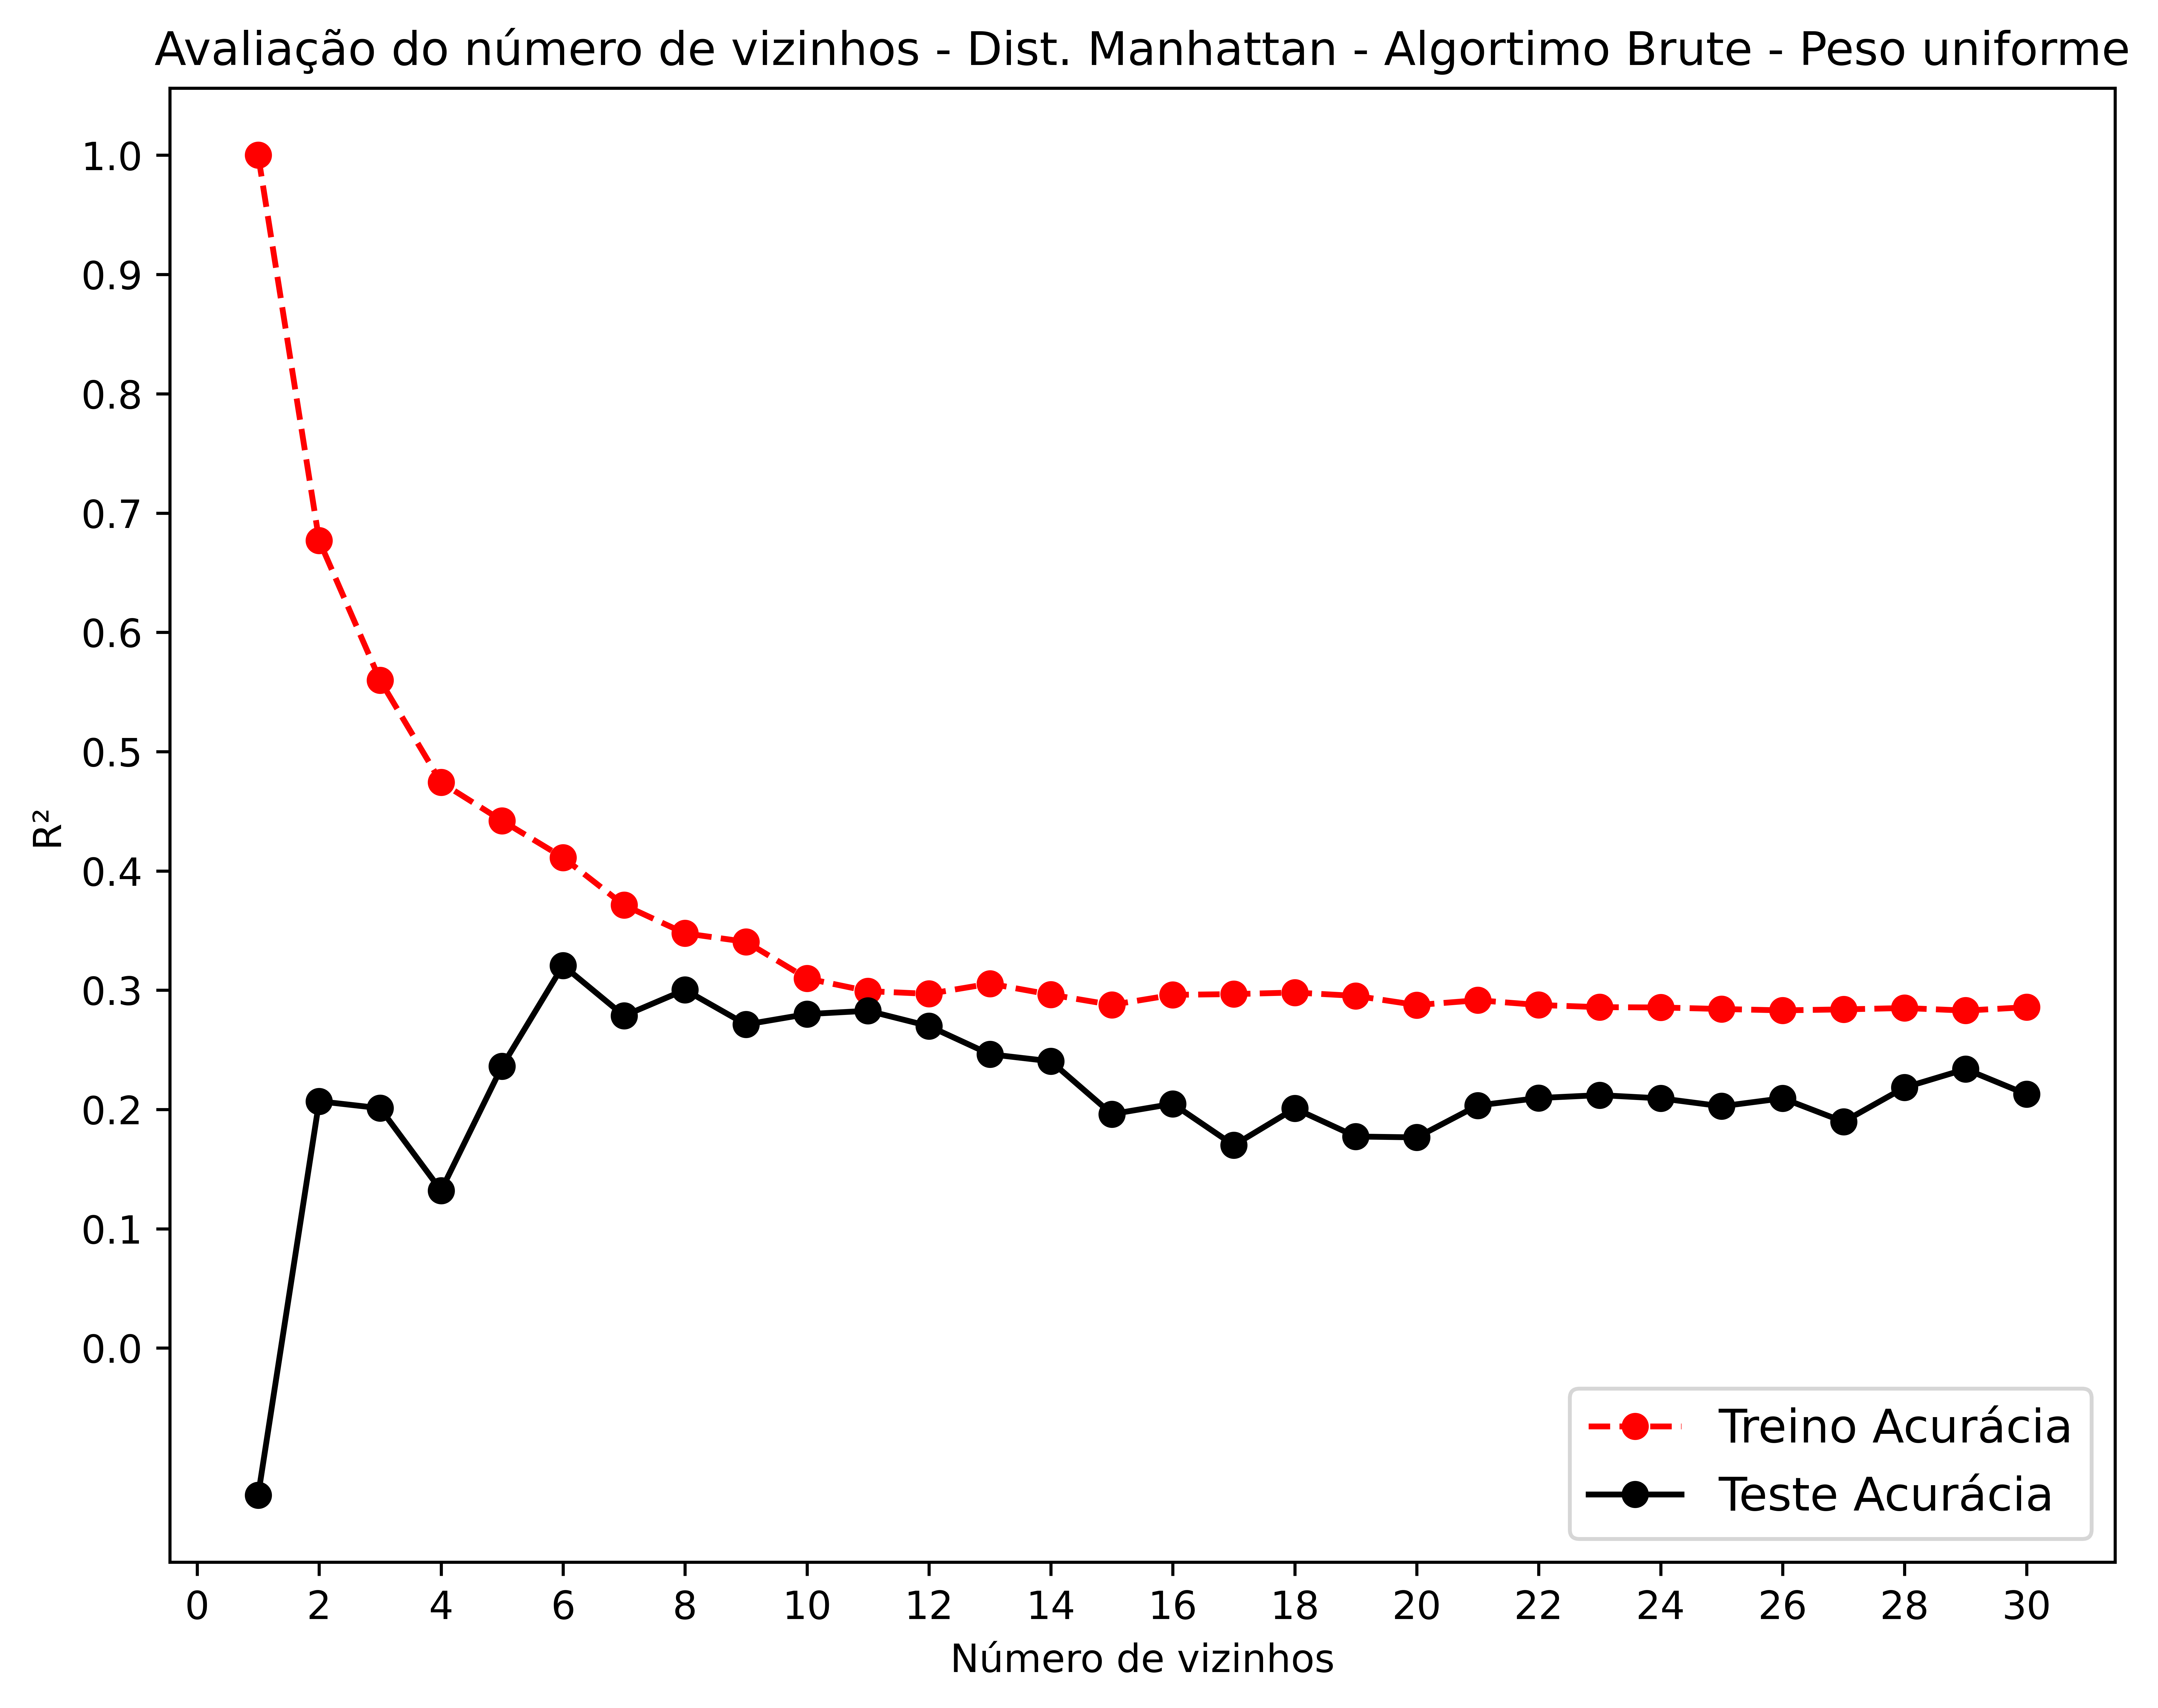

In [34]:
# Avaliação do Número de vizinhos - P=1 - Distância de Manhattan - Algortimo Brute - Peso uniforme

n_nei_p1 = np.empty(0)
train_score_knn_p1 = np.empty(0)
test_score_knn_p1 = np.empty(0)
pred_p1 = pd.DataFrame()
pred_p1["real"] = Y_test.squeeze()
for n_nei_value in np.arange(1, 31, 1):
    knn = KNeighborsRegressor(n_neighbors=n_nei_value,p=1,algorithm='brute',weights='uniform')
    n_nei_p1 = np.append(n_nei_p1, n_nei_value)
    knn.fit(X_train_scaled,Y_train)
    train_score_knn_p1 = np.append(train_score_knn_p1, knn.score(X_train_scaled,Y_train))
    test_score_knn_p1 =  np.append(test_score_knn_p1, knn.score(X_test_scaled,Y_test))
    knn_pred_p1 = knn.predict(X_test_scaled)
    pred_p1[n_nei_value] = knn_pred_p1
fig, axs = plt.subplots(figsize=(9,7))
#axs.annotate('Máxima Acurácia', xy=(5, 0.4), xytext=(7, 0.6),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.plot(n_nei_p1, train_score_knn_p1, color='red',marker="o",linestyle='dashed',label='Treino Acurácia')
plt.plot(n_nei_p1, test_score_knn_p1, color='black',marker="o",label='Teste Acurácia')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 30.1, 2))
plt.legend(loc=4, prop={'size': 12})
plt.xlabel('Número de vizinhos')
plt.ylabel('R²')
plt.title('Avaliação do número de vizinhos - Dist. Manhattan - Algortimo Brute - Peso uniforme')
plt.show()

In [35]:
# criando Data Frame com resultados Modelo 1 e exportando
result_p1 = pd.DataFrame()
result_p1["nº de vizinhos"] = n_nei_p1
result_p1["R² Treino"] = train_score_knn_p1
result_p1['R² Teste'] = test_score_knn_p1
result_p1.to_excel('1.KNN R² Treino e Teste Manhattan.xlsx', index=False)

# predicao
pred_p1.to_excel('2.KNN Resultado Predição Manhattan.xlsx', index=False)

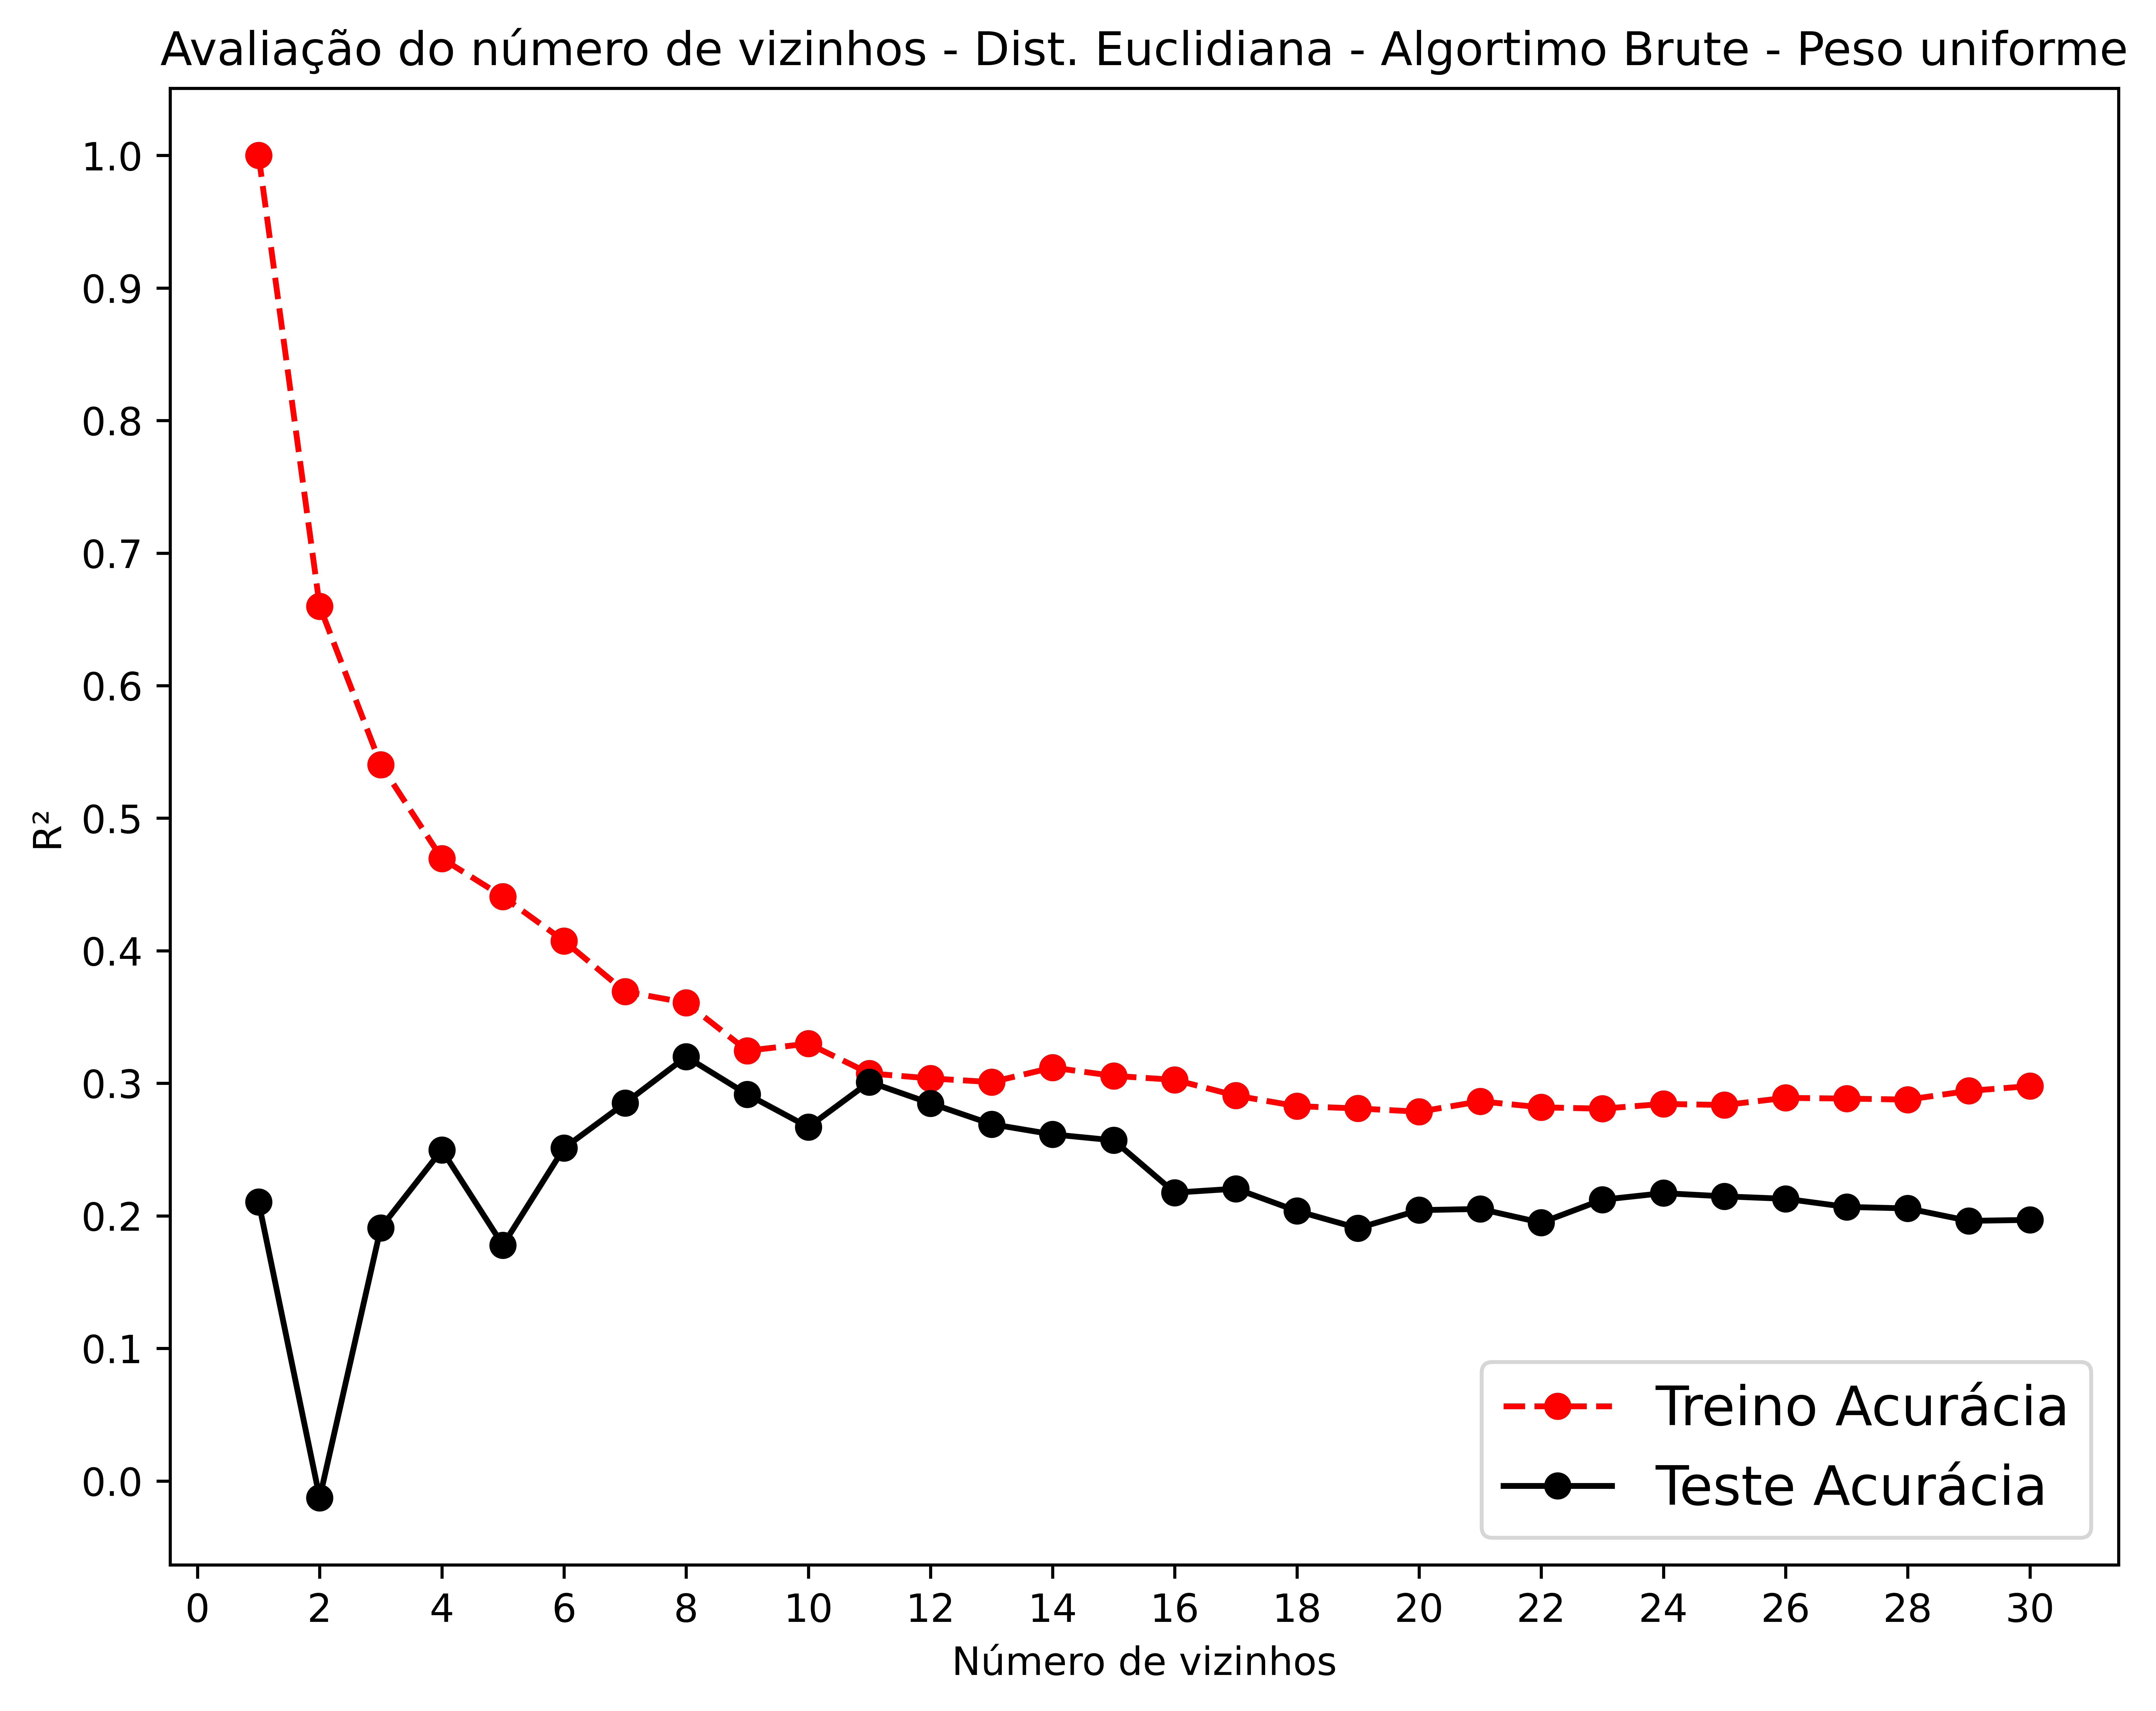

In [36]:
# Avaliação do Número de vizinhos - P=2 - Distância Euclidiana - Algortimo Brute - Peso uniforme

n_nei_p2 = np.empty(0)
train_score_knn_p2 = np.empty(0)
test_score_knn_p2 = np.empty(0)
pred_p2 = pd.DataFrame()
pred_p2["real"] = Y_test.squeeze()
for n_nei_value in np.arange(1, 31, 1):
    knn = KNeighborsRegressor(n_neighbors=n_nei_value,p=2,algorithm='brute',weights='uniform')
    n_nei_p2 = np.append(n_nei_p2, n_nei_value)
    knn.fit(X_train_scaled,Y_train)
    train_score_knn_p2 = np.append(train_score_knn_p2, knn.score(X_train_scaled,Y_train))
    test_score_knn_p2 =  np.append(test_score_knn_p2, knn.score(X_test_scaled,Y_test))
    knn_pred_p2 = knn.predict(X_test_scaled)
    pred_p2[n_nei_value] = knn_pred_p2
fig, axs = plt.subplots(figsize=(9,7))
#axs.annotate('Máxima Acurácia', xy=(5, 0.4), xytext=(7, 0.6),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.plot(n_nei_p2, train_score_knn_p2, color='red',marker="o",linestyle='dashed',label='Treino Acurácia')
plt.plot(n_nei_p2, test_score_knn_p2, color='black',marker="o",label='Teste Acurácia')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 30.1, 2))
plt.legend(loc=4, prop={'size': 14})
plt.xlabel('Número de vizinhos')
plt.ylabel('R²')
plt.title('Avaliação do número de vizinhos - Dist. Euclidiana - Algortimo Brute - Peso uniforme')
plt.show()

In [37]:
# criando Data Frame com resultados Modelo 2 e exportando
result_p2 = pd.DataFrame()
result_p2["nº de vizinhos"] = n_nei_p2
result_p2["R² Treino"] = train_score_knn_p2
result_p2['R² Teste'] = test_score_knn_p2
result_p2.to_excel('3.KNN R² Treino e Teste Euclidiana.xlsx', index=False)

# predicao
pred_p2.to_excel('4.KNN Resultado Predição Euclidiana.xlsx', index=False)

## Regressão Linear Múltipla

In [38]:
# Criando Modelo
LR = LinearRegression()

#Definindo banco de dados

X_LR_train=pd.DataFrame(X_train_scaled)
X_LR_test=pd.DataFrame(X_test_scaled)
Y_LR_train=pd.DataFrame(Y_train)
Y_LR_test=pd.DataFrame(Y_test)

#Fitando o modelo
LR.fit(X_LR_train, Y_LR_train)

#Obtendo as predições
Y_LRpred = LR.predict(X_LR_test)

# Criando Data Frame com resultados 
Y_test=Y_test.squeeze()
Y_LRpred=Y_LRpred.squeeze()
Y_LRpred_df = pd.DataFrame({'Real':Y_test,'Predito':Y_LRpred})

# Avaliando o R²
print('R²= %.4f'% r2_score(Y_LR_test,Y_LRpred))

#Exportando as predições
Y_LRpred_df.to_excel('5.RLM Resultado da Predição da Regressão Linear.xlsx',index=False)

#Criando Data Frame com os coeficientes lineares
LR.coef_df=pd.DataFrame(LR.coef_)

#Exportando os coeficientes lineares
LR.coef_df.to_excel('6.RLM Coeficientes da Regressão Linear.xlsx',index=False)

R²= 0.1650


## Árvore de Decisão

In [41]:
# Avaliação do número de árvores da Floresta Aleatória

#Parâmetros do modelo
Decision_tree_split_best_m1 = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=1,random_state=25)
Decision_tree_split_best_m2 = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=2,random_state=25)
Decision_tree_split_best_m3 = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3,random_state=25)
Decision_tree_split_best_m4 = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=4,random_state=25)
Decision_tree_split_best_m5 = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=5,random_state=25)
Decision_tree_split_random_m1 = DecisionTreeRegressor(criterion='mse',splitter='random',max_depth=1,random_state=25)
Decision_tree_split_random_m2 = DecisionTreeRegressor(criterion='mse',splitter='random',max_depth=2,random_state=25)
Decision_tree_split_random_m3 = DecisionTreeRegressor(criterion='mse',splitter='random',max_depth=3,random_state=25)
Decision_tree_split_random_m4 = DecisionTreeRegressor(criterion='mse',splitter='random',max_depth=4,random_state=25)
Decision_tree_split_random_m5 = DecisionTreeRegressor(criterion='mse',splitter='random',max_depth=5,random_state=25)

#Treinando o modelos
Decision_tree_split_best_m1.fit(X_train_scaled,Y_train)
Decision_tree_split_best_m2.fit(X_train_scaled,Y_train)
Decision_tree_split_best_m3.fit(X_train_scaled,Y_train)
Decision_tree_split_best_m4.fit(X_train_scaled,Y_train)
Decision_tree_split_best_m5.fit(X_train_scaled,Y_train)
Decision_tree_split_random_m1.fit(X_train_scaled,Y_train)
Decision_tree_split_random_m2.fit(X_train_scaled,Y_train)
Decision_tree_split_random_m3.fit(X_train_scaled,Y_train)
Decision_tree_split_random_m4.fit(X_train_scaled,Y_train)
Decision_tree_split_random_m5.fit(X_train_scaled,Y_train)

#Obtendo resultados
Decision_tree_split_best_m1p=Decision_tree_split_best_m1.predict(X_test_scaled)
Decision_tree_split_best_m2p=Decision_tree_split_best_m2.predict(X_test_scaled)
Decision_tree_split_best_m3p=Decision_tree_split_best_m3.predict(X_test_scaled)
Decision_tree_split_best_m4p=Decision_tree_split_best_m3.predict(X_test_scaled)
Decision_tree_split_best_m5p=Decision_tree_split_best_m3.predict(X_test_scaled)
Decision_tree_split_random_m1p=Decision_tree_split_random_m1.predict(X_test_scaled)
Decision_tree_split_random_m2p=Decision_tree_split_random_m2.predict(X_test_scaled)
Decision_tree_split_random_m3p=Decision_tree_split_random_m3.predict(X_test_scaled)
Decision_tree_split_random_m4p=Decision_tree_split_random_m3.predict(X_test_scaled)
Decision_tree_split_random_m5p=Decision_tree_split_random_m3.predict(X_test_scaled)

#Criando dataframe com os resultados
Y_test=Y_test.squeeze()
result_dt_p1 = pd.DataFrame({'Real':Y_test,
                             'Decision tree best m1':Decision_tree_split_best_m1p,
                             'Decision tree best m2':Decision_tree_split_best_m2p,
                             'Decision tree best m3':Decision_tree_split_best_m3p,
                             'Decision tree best m4':Decision_tree_split_best_m4p,
                             'Decision tree best m5':Decision_tree_split_best_m5p,
                             'Decision tree random m1':Decision_tree_split_random_m1p,
                             'Decision tree random m2':Decision_tree_split_random_m2p,
                             'Decision tree random m3':Decision_tree_split_random_m3p,
                             'Decision tree random m4':Decision_tree_split_random_m4p,
                             'Decision tree random m5':Decision_tree_split_random_m5p})

# Exportando predição
result_dt_p1.to_excel('7.DTR Resultado Árvore de Decisão.xlsx', index=False)

#Features
Features_best_m1=Decision_tree_split_best_m1.feature_importances_
Features_best_m2=Decision_tree_split_best_m2.feature_importances_
Features_best_m3=Decision_tree_split_best_m3.feature_importances_
Features_best_m4=Decision_tree_split_best_m4.feature_importances_
Features_best_m5=Decision_tree_split_best_m5.feature_importances_
Features_random_m1=Decision_tree_split_random_m1.feature_importances_
Features_random_m2=Decision_tree_split_random_m2.feature_importances_
Features_random_m3=Decision_tree_split_random_m3.feature_importances_
Features_random_m4=Decision_tree_split_random_m4.feature_importances_
Features_random_m5=Decision_tree_split_random_m5.feature_importances_
variaveis = ['qc (kPa)','fs (kPa)','u2 (kPa)','uo (kPa)','T.S.']

#Criando dataframe com as features
Features=pd.DataFrame({'Decision tree best m1':Features_best_m1,
                       'Decision tree best m2':Features_best_m2,
                       'Decision tree best m3':Features_best_m3,
                       'Decision tree best m4':Features_best_m4,
                       'Decision tree best m5':Features_best_m5,
                       'Decision tree random m1':Features_random_m1,
                       'Decision tree random m2':Features_random_m2,
                       'Decision tree random m3':Features_random_m3,
                       'Decision tree random m4':Features_random_m4,
                       'Decision tree random m5':Features_random_m5})

# Exportando Features
Features.to_excel('8.DTR Features Árvore de Decisão.xlsx', index=False)

In [42]:
#Plotando a Árvores geradas

#fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(25,25))
#splits = ['qc (kPa)','fs (kPa)','u2 (kPa)','uo (kPa)','T.S.']
#tree.plot_tree(Decision_tree_split_random_m4,feature_names=splits);

## Florestas Aleatórias

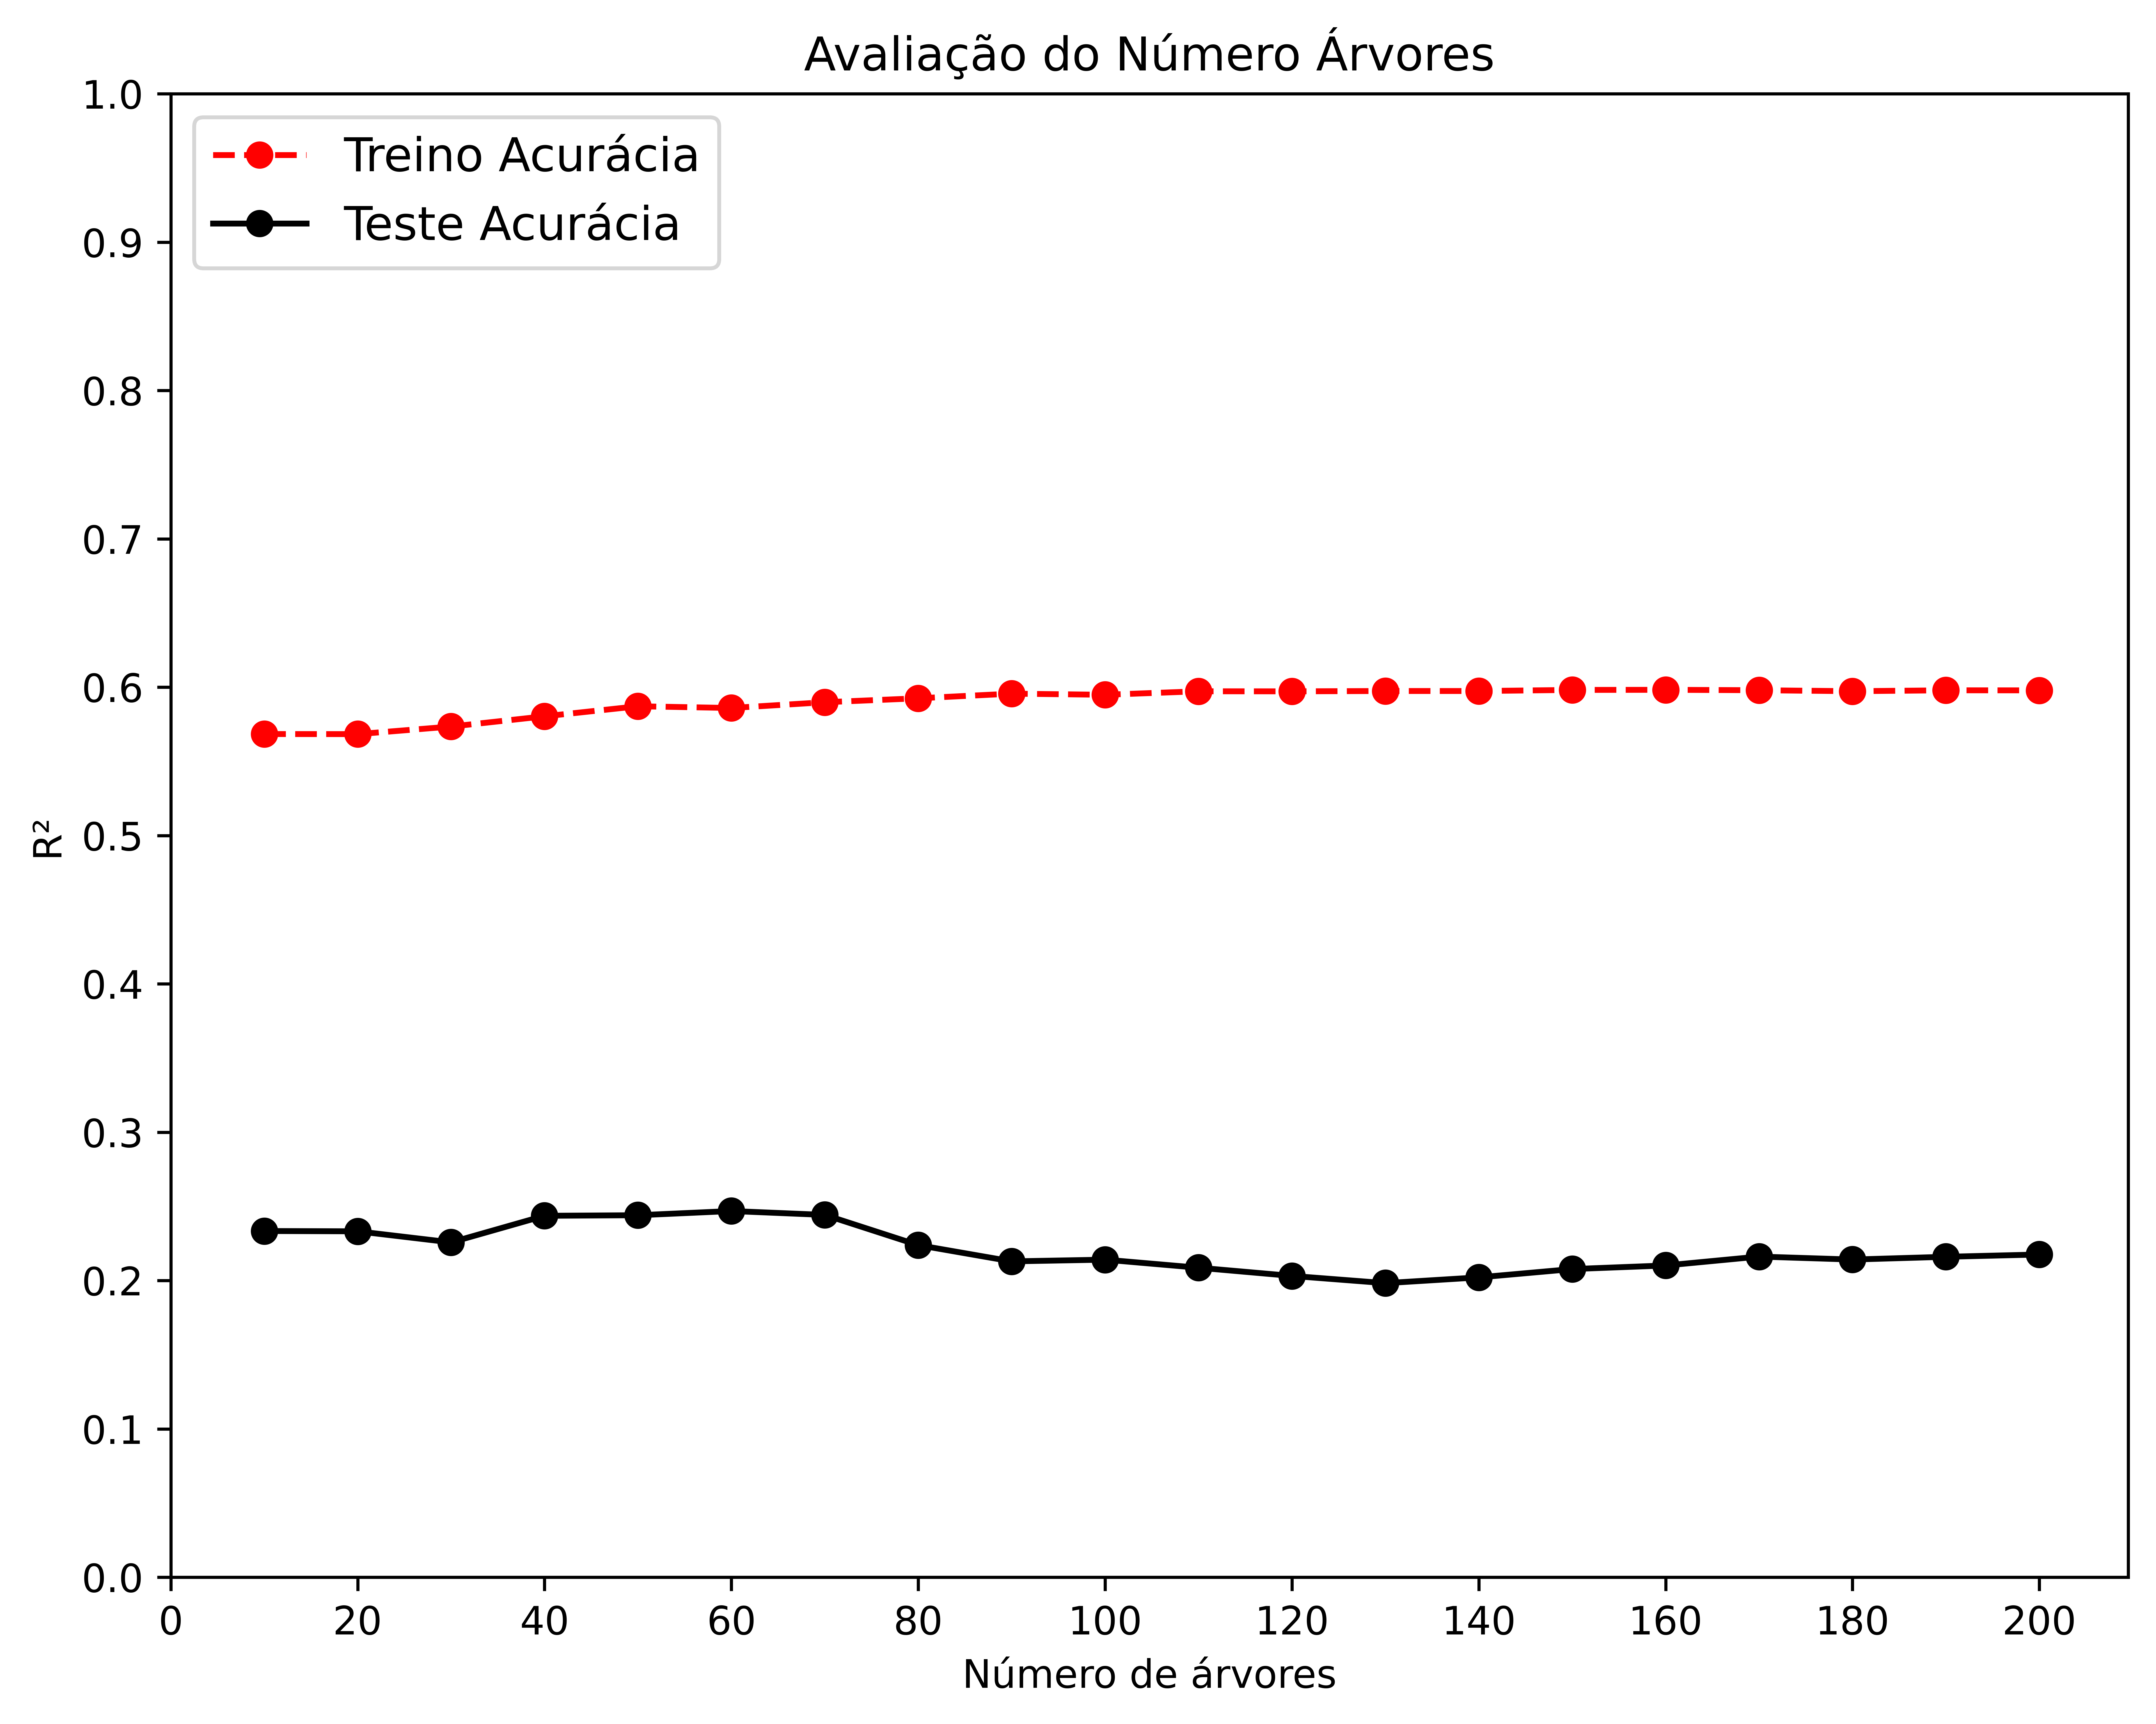

In [43]:
# Avaliação da número de árvores da Floresta Aleatória

n_trees = np.empty(0)
train_score_rf_p1 = np.empty(0)
test_score_rf_p1 = np.empty(0)
pred_rf_p1 = pd.DataFrame()
Y_train=Y_train.squeeze()
Y_test=Y_test.squeeze()
pred_rf_p1["real"] = Y_test.squeeze()
n_nei_valuerf = np.arange(10, 201, 10)
for n_nei_valuerf in np.arange(10, 201, 10):
    random_forest=RandomForestRegressor(n_estimators=n_nei_valuerf,criterion='mse',max_depth=5,bootstrap=True,random_state=22)
    n_trees = np.append(n_trees, n_nei_valuerf)
    random_forest.fit(X_train_scaled,Y_train)
    train_score_rf_p1 = np.append(train_score_rf_p1, random_forest.score(X_train_scaled,Y_train))
    test_score_rf_p1 =  np.append(test_score_rf_p1, random_forest.score(X_test_scaled,Y_test))
    random_forest_p1 = random_forest.predict(X_test_scaled)
    pred_rf_p1[n_nei_valuerf] = random_forest_p1
fig, axs = plt.subplots(figsize=(9,7))
#axs.annotate('Máxima Acurácia', xy=(5, 0.4), xytext=(7, 0.6),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.plot(n_trees, train_score_rf_p1, color='red',marker="o",linestyle='dashed',label='Treino Acurácia')
plt.plot(n_trees, test_score_rf_p1, color='black',marker="o",label='Teste Acurácia')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 201, 20))
plt.legend(loc=2, prop={'size': 12})
plt.xlabel('Número de árvores')
plt.ylabel('R²')
plt.title('Avaliação do Número Árvores')
plt.show()

In [44]:
# Criando Data Frame com resultados da Random Forest e exportando

result_rf_p1 = pd.DataFrame()
result_rf_p1["Nº de Árvores"] = n_trees
result_rf_p1["R² Treino"] = train_score_rf_p1
result_rf_p1["R² Teste"] = test_score_rf_p1
result_rf_p1.to_excel('9.RF R² Treino e Teste Random Forest - Número de Árvores.xlsx', index=False)

# Exportando predição
pred_rf_p1.to_excel('10.RF Resultado Predição Random Forest - Número de Árvores.xlsx', index=False)

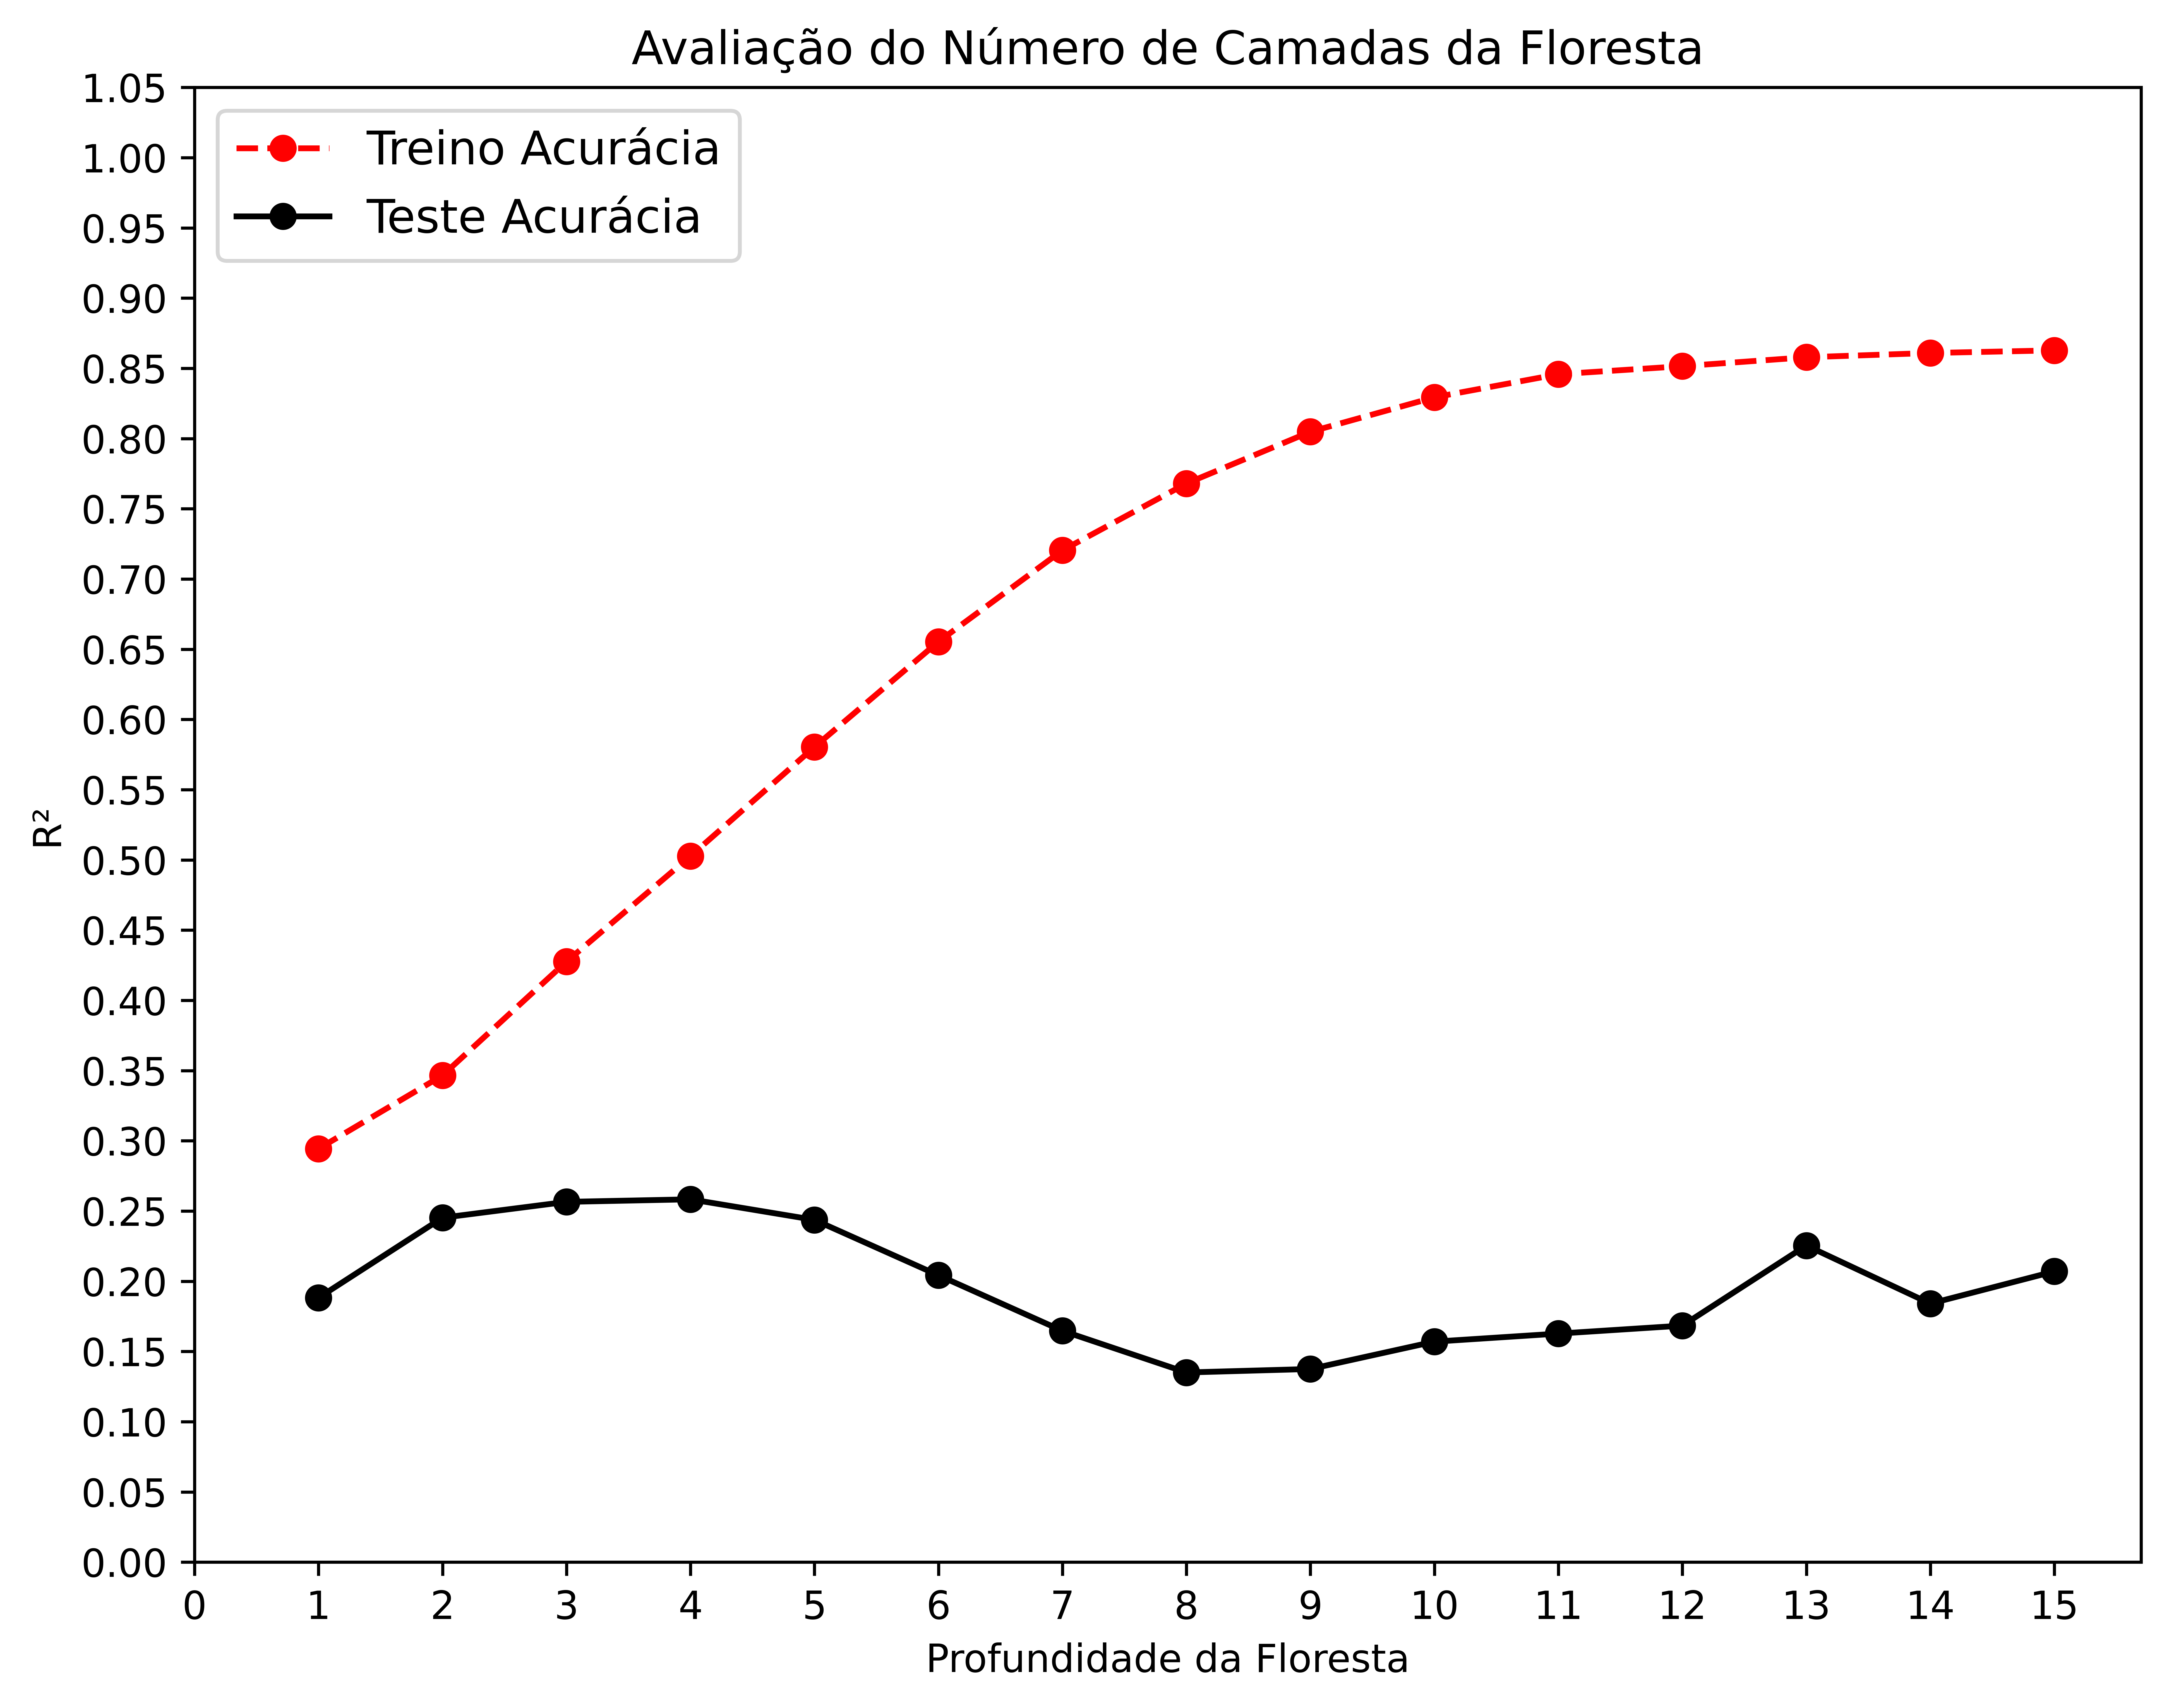

In [45]:
# Avaliação da profundidade da Floresta Aleatória

n_depth = np.empty(0)
train_score_rf_p2 = np.empty(0)
test_score_rf_p2 = np.empty(0)
pred_rf_p2 = pd.DataFrame()
Y_train=Y_train.squeeze()
Y_test=Y_test.squeeze()
pred_rf_p2["real"] = Y_test.squeeze()
n_nei_valuerf_p2 = np.arange(1, 16, 1)
for n_nei_valuerf_p2 in np.arange(1, 16, 1):
    random_forest=RandomForestRegressor(n_estimators=40,criterion='mse',max_depth=n_nei_valuerf_p2,bootstrap=True,random_state=22)
    n_depth = np.append(n_depth, n_nei_valuerf_p2)
    random_forest.fit(X_train_scaled,Y_train)
    train_score_rf_p2 = np.append(train_score_rf_p2, random_forest.score(X_train_scaled,Y_train))
    test_score_rf_p2 =  np.append(test_score_rf_p2, random_forest.score(X_test_scaled,Y_test))
    random_forest_p2 = random_forest.predict(X_test_scaled)
    pred_rf_p2[n_nei_valuerf_p2] = random_forest_p2
fig, axs = plt.subplots(figsize=(9,7))
#axs.annotate('Máxima Acurácia', xy=(5, 0.4), xytext=(7, 0.6),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.plot(n_depth, train_score_rf_p2, color='red',marker="o",linestyle='dashed',label='Treino Acurácia')
plt.plot(n_depth, test_score_rf_p2, color='black',marker="o",label='Teste Acurácia')
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xticks(np.arange(0, 15.1, 1))
plt.legend(loc=2, prop={'size': 12})
plt.xlabel('Profundidade da Floresta')
plt.ylabel('R²')
plt.title('Avaliação do Número de Camadas da Floresta')
plt.show()

In [46]:
# Criando Data Frame com resultados da Random Forest-2 e exportando

result_rf_p2 = pd.DataFrame()
result_rf_p2["Nº de Camadas"] = n_depth
result_rf_p2["R² Treino"] = train_score_rf_p2
result_rf_p2["R² Teste"] = test_score_rf_p2
result_rf_p2.to_excel('11.RF R² Treino e Teste Random Forest - Profundidade da Floresta.xlsx', index=False)

# Exportando predição
pred_rf_p2.to_excel('12.RF Resultado Predição Random Forest - Profundidade da Floresta.xlsx', index=False)

## Máquina de Vetor Suporte - SVM

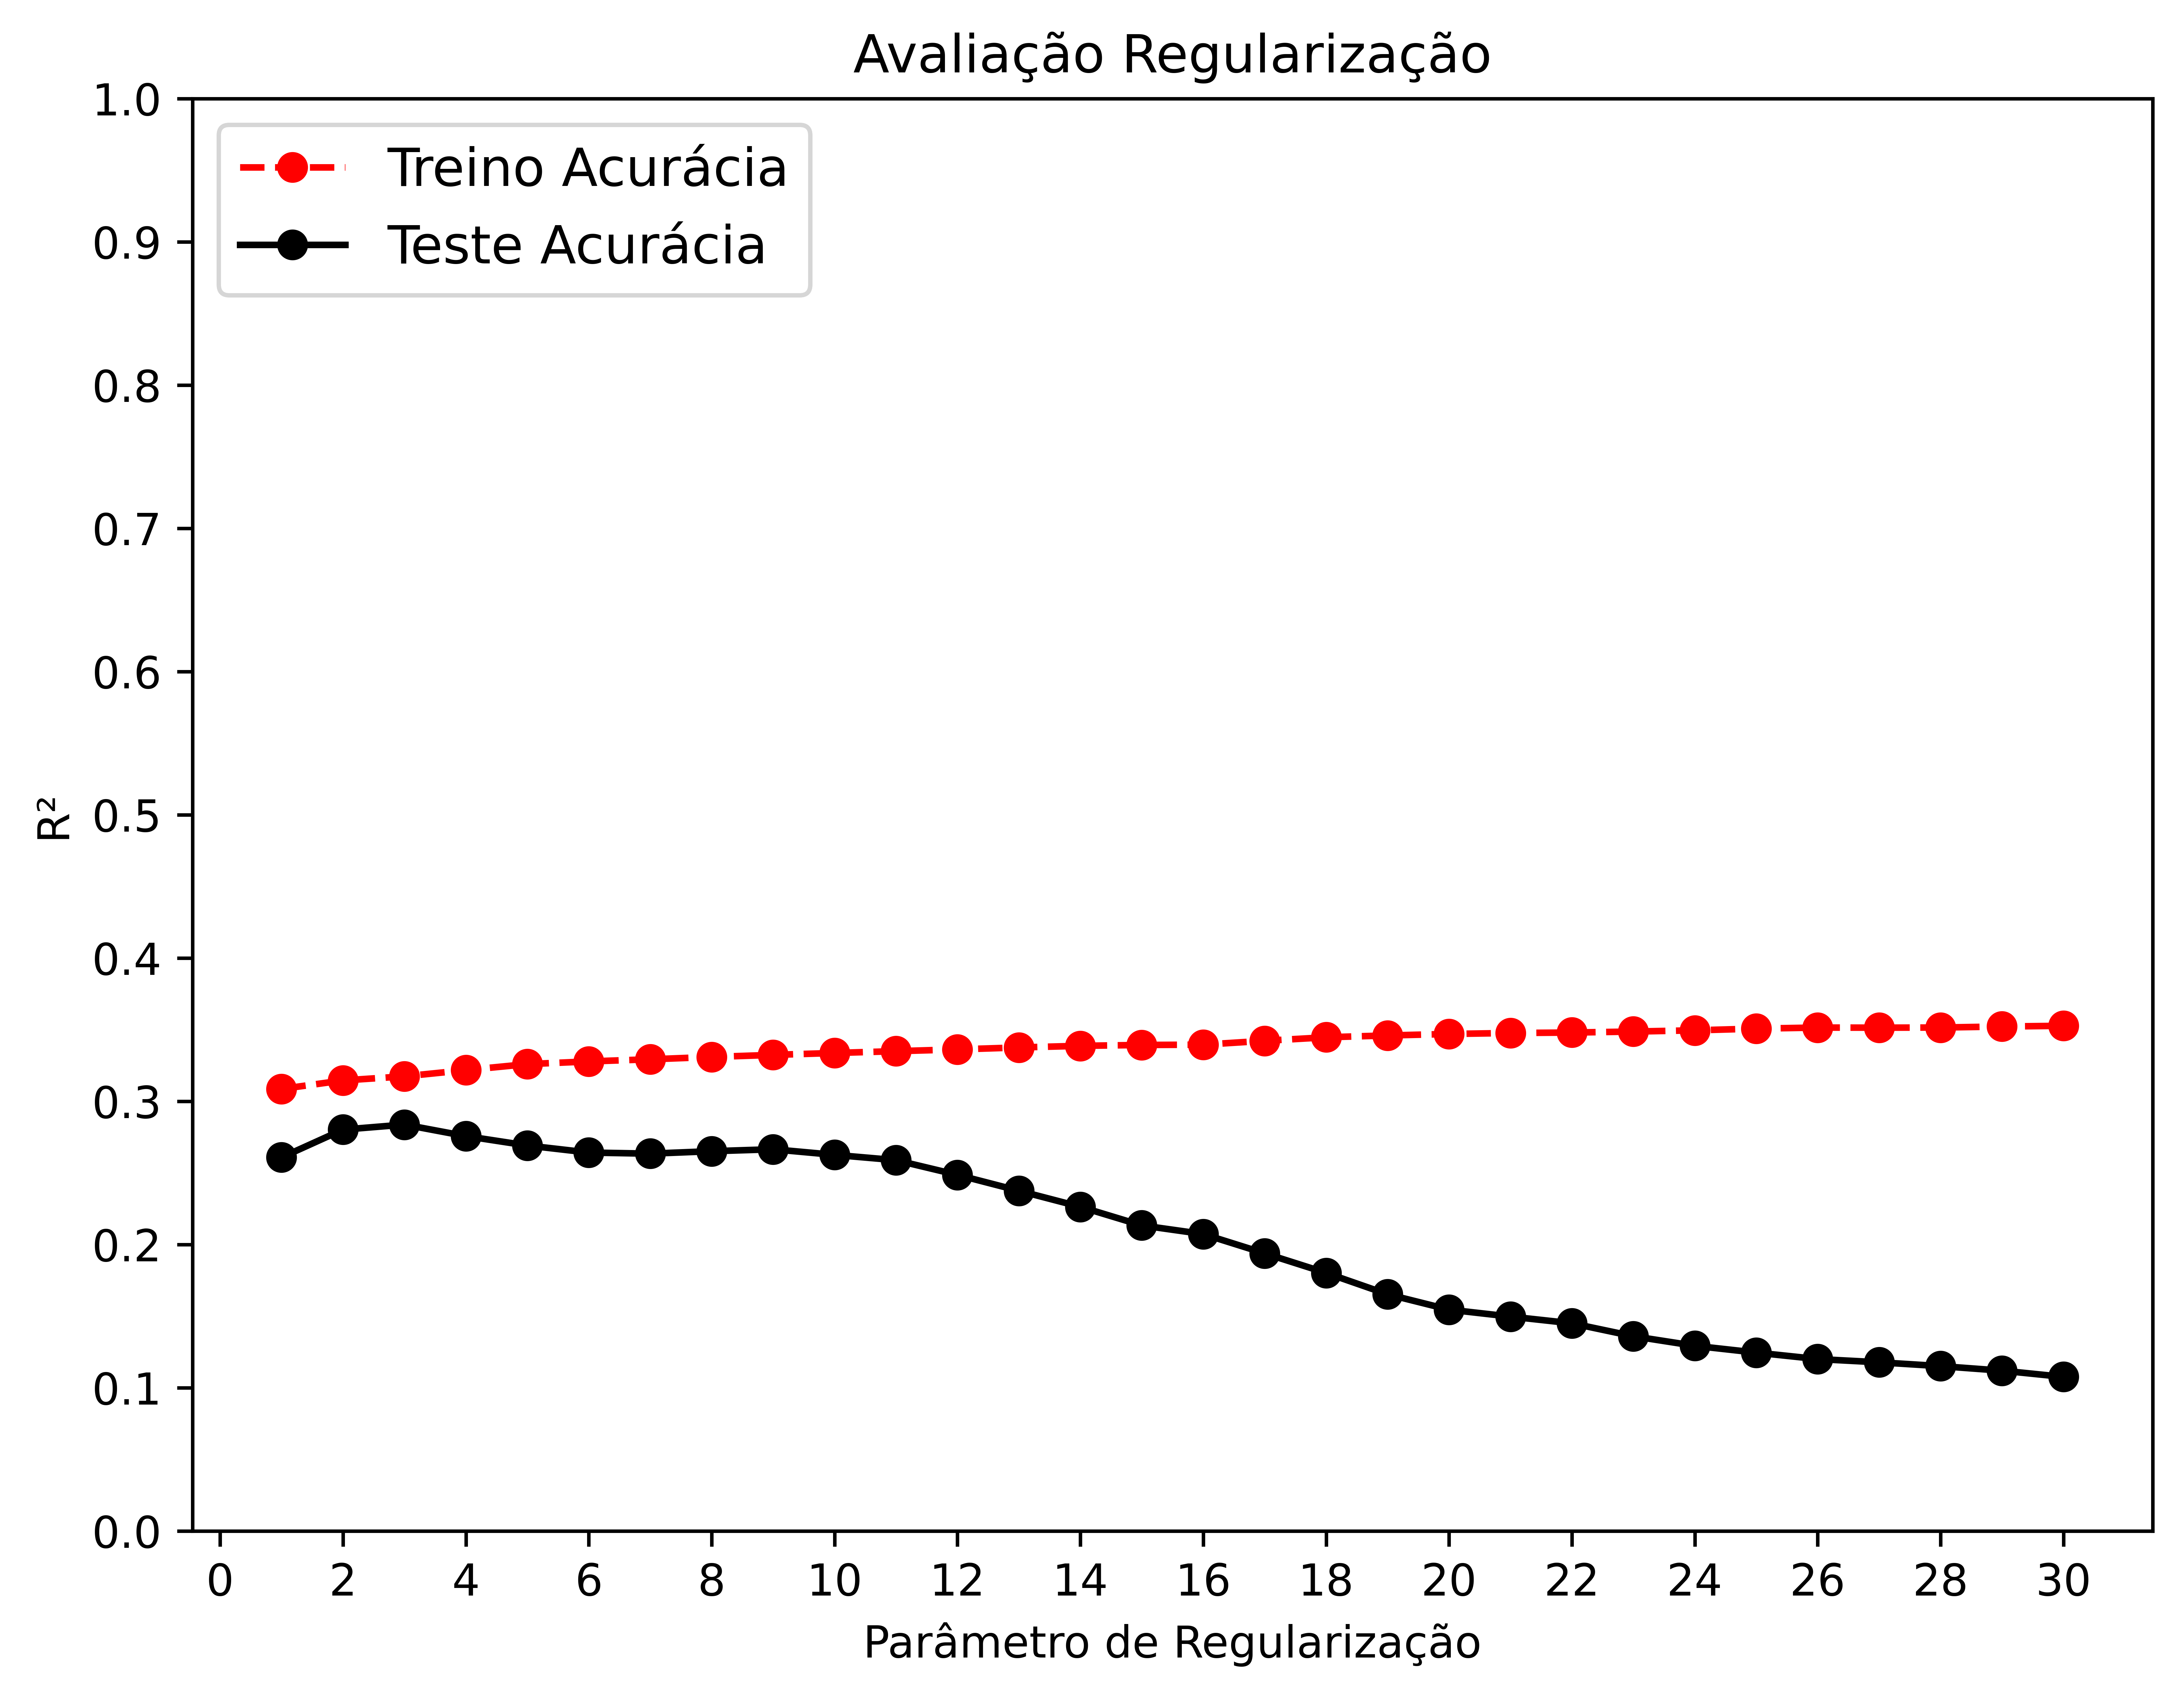

In [47]:
# Máquina de Vetor Suporte - Regularização 

C = np.empty(0)
train_score_svm = np.empty(0)
test_score_svm = np.empty(0)
pred_svm_p1= pd.DataFrame()
Y_train=Y_train.squeeze()
Y_test=Y_test.squeeze()
pred_svm_p1["real"] = Y_test.squeeze()
for C_value in np.arange(1, 31, 1):
    svm = SVR(C=C_value, kernel='rbf',epsilon=0.2)
    C = np.append(C, C_value)
    svm.fit(X_train_scaled,Y_train)
    train_score_svm = np.append(train_score_svm, svm.score(X_train_scaled,Y_train))
    test_score_svm =  np.append(test_score_svm, svm.score(X_test_scaled,Y_test))
    svm_p1 = svm.predict(X_test_scaled)
    pred_svm_p1[C_value] = svm_p1
fig, axs = plt.subplots(figsize=(8,6))
plt.plot(C, train_score_svm, color='red',marker="o",linestyle='dashed',label='Treino Acurácia')
plt.plot(C, test_score_svm, color='black',marker="o",label='Teste Acurácia')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 30.1, 2))
plt.legend(loc=2, prop={'size': 12})
plt.xlabel('Parâmetro de Regularização')
plt.ylabel('R²')
plt.title('Avaliação Regularização')
plt.show();

In [48]:
# Criando Data Frame com resultados do SVM

result_svm_p1 = pd.DataFrame()
result_svm_p1["Regularização"] = C
result_svm_p1["R² Treino"] = train_score_svm
result_svm_p1['R² Teste'] = test_score_svm
result_svm_p1.to_excel('13.SVM R² treino e teste SVM.xlsx', index=False)

# Exportando predição
pred_svm_p1.to_excel('14.SVM Resultados SVM Predição.xlsx', index=False)